Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [6]:
import os
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('Data/MTP.Fan.Data1.csv')
df = df.fillna(0) # lọc
raw_df = df
df = df.loc[:, ["post_id", "time"]]

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   post_id  100 non-null    int64 
 1   time     100 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [8]:
import pandas as pd
df['time'] = pd.to_datetime(df['time'].str.strip(), format='%m/%d/%Y %H:%M')
    

In [9]:
df['hour'] = df['time'].dt.hour
df['weekdays'] = df['time'].dt.strftime('%A')

In [10]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   post_id   100 non-null    int64         
 1   time      100 non-null    datetime64[ns]
 2   hour      100 non-null    int64         
 3   weekdays  100 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ KB


,post_id,time,hour,weekdays
0,914572133358514,2023-11-26 12:02:00,12,Sunday
1,909413080541086,2023-11-16 12:00:00,12,Thursday
2,899875031494891,2023-10-28 13:01:00,13,Saturday
3,896290081853386,2023-10-22 06:38:00,6,Sunday
4,895309625284765,2023-10-20 09:51:00,9,Friday


In [11]:
earliest_post_time = df['time'].min()
latest_post_time = df['time'].max()
print(earliest_post_time)
print(latest_post_time)

2022-10-07 07:00:00
2023-11-26 12:02:00


In [12]:
posts_by_hour = df.groupby('hour').size()
print(posts_by_hour)

hour
3      4
4      5
5     18
6      3
7      4
8      3
9      6
10     4
11     3
12    16
13    25
14     6
17     3
dtype: int64


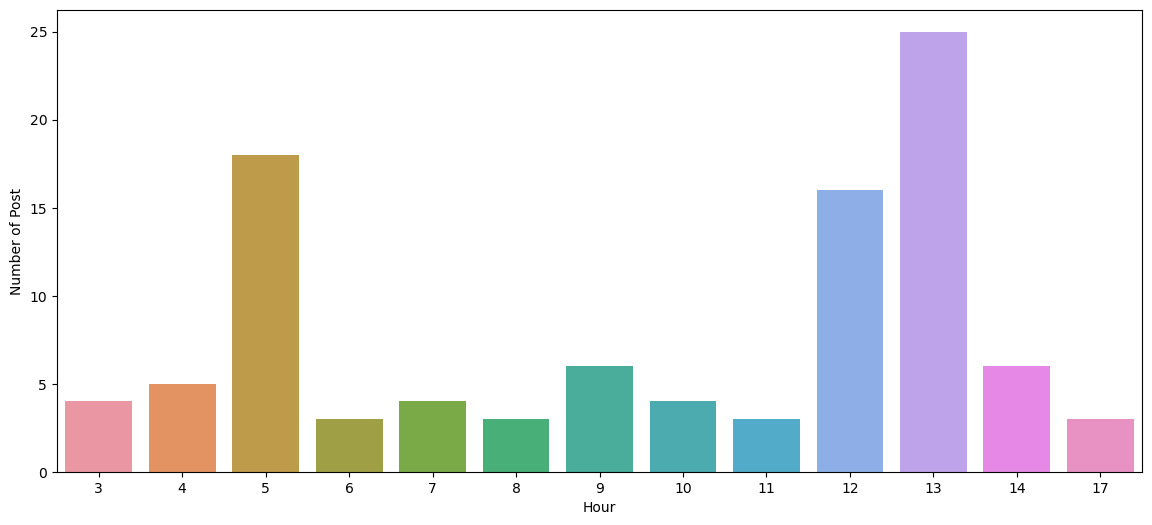

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (14,6))
sns.countplot(
    data= df,
    x = 'hour'
)
plt.xlabel('Hour')
plt.ylabel('Number of Post')
plt.show()

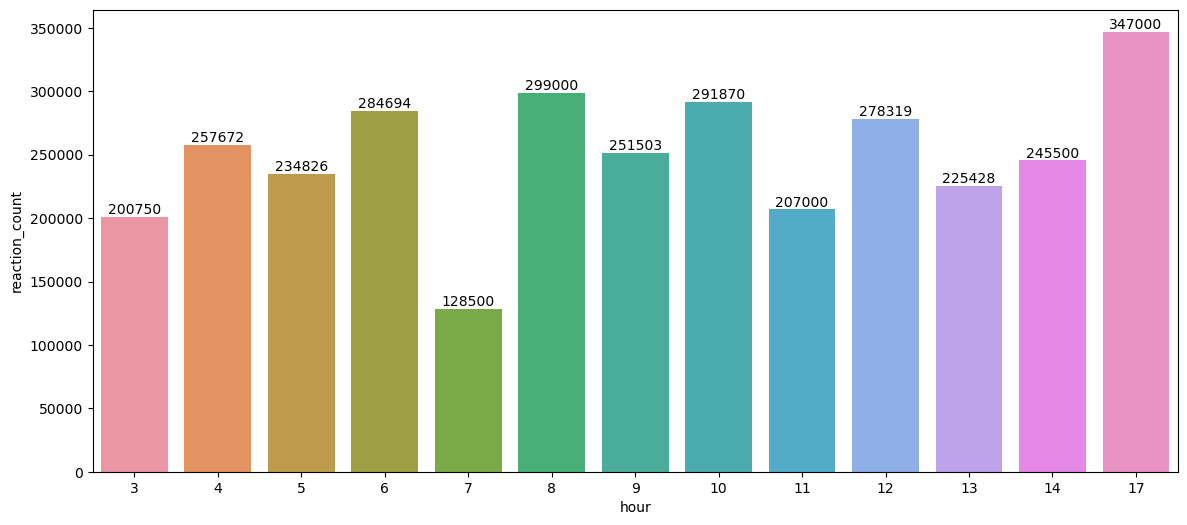

In [14]:
import pandas as pd
raw_df['time'] = pd.to_datetime(raw_df['time'].str.strip(), format='%m/%d/%Y %H:%M')
raw_df['hour'] = raw_df['time'].dt.hour
reaction_mean = raw_df.groupby('hour')['reaction_count'].mean().reset_index()
plt.figure(figsize=(14,6))
ax1 = sns.barplot(
    data= reaction_mean,
    x = 'hour',
    y = 'reaction_count'
)
plt.bar_label(ax1.containers[0])
plt.show()

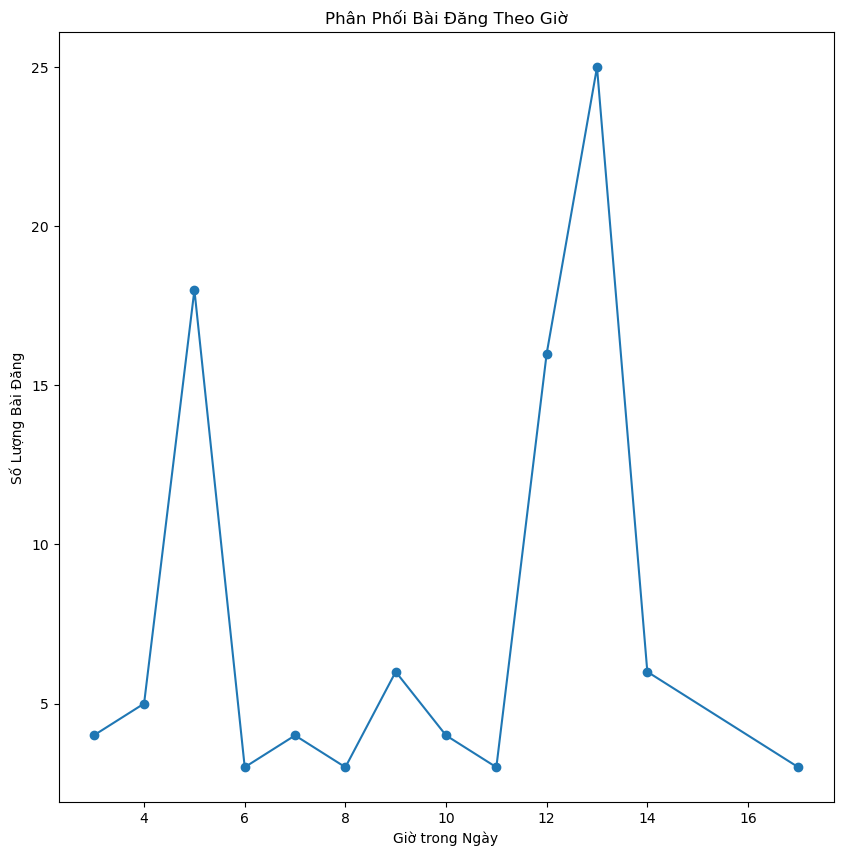

In [15]:
plt.figure(figsize=(10, 10))
plt.plot(posts_by_hour.index, posts_by_hour.values, marker='o')
plt.xlabel('Giờ trong Ngày')
plt.ylabel('Số Lượng Bài Đăng')
plt.title('Phân Phối Bài Đăng Theo Giờ')
plt.show()

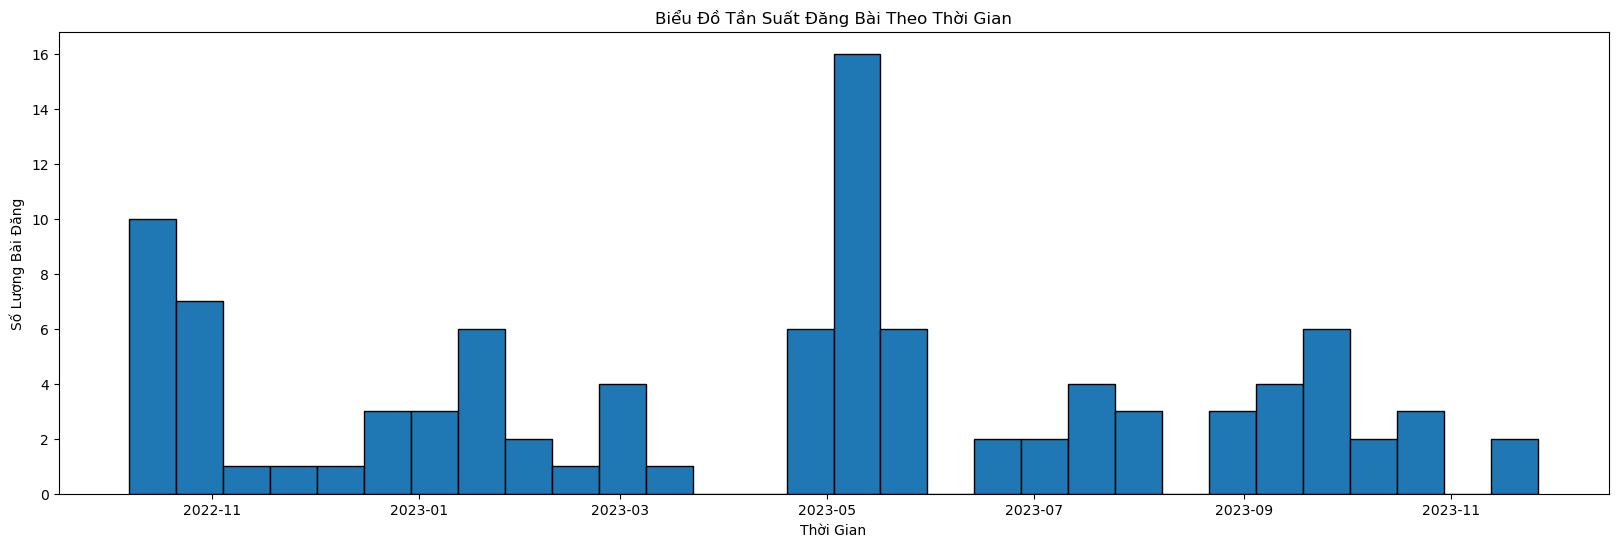

In [16]:
plt.figure(figsize=(20, 6))
plt.hist(df['time'][:-1], bins=30, edgecolor='black')
plt.xlabel('Thời Gian')
plt.ylabel('Số Lượng Bài Đăng')
plt.title('Biểu Đồ Tần Suất Đăng Bài Theo Thời Gian')
plt.show()

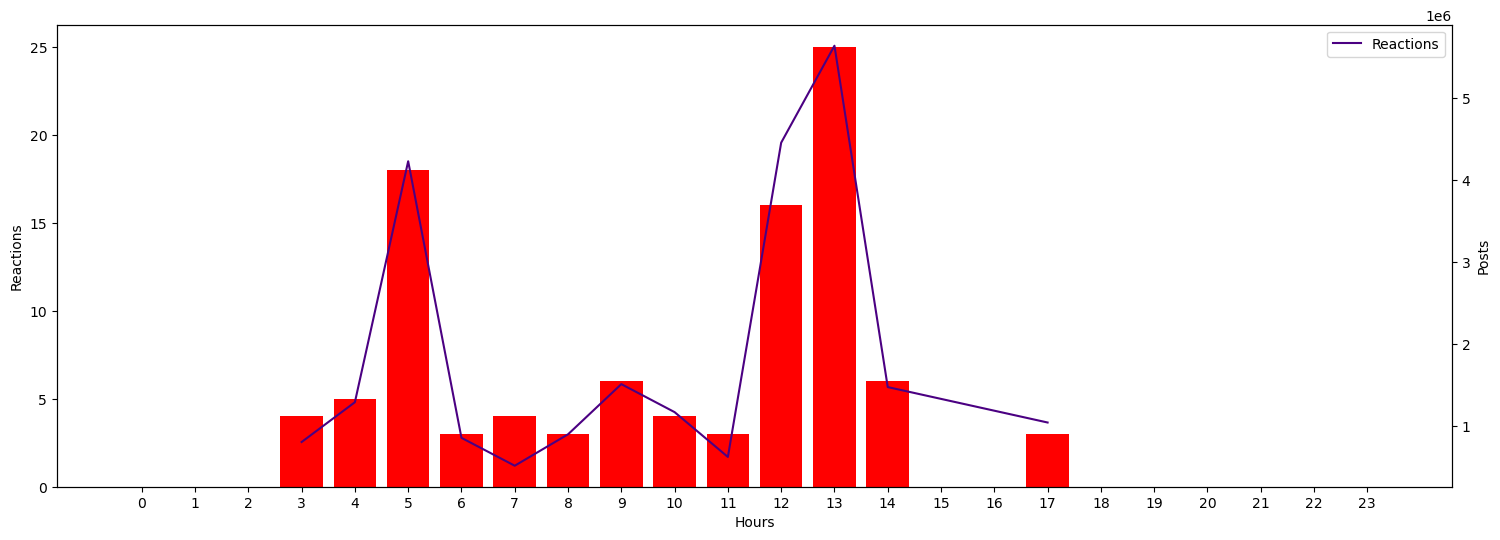

In [17]:
reactions = raw_df.groupby('hour')['reaction_count'].sum()
posts_by_hour = raw_df['hour'].value_counts()
posts_by_hour = posts_by_hour.reindex(range(24), fill_value=0)
reactions_by_hour = reactions.reindex(range(24), fill_value=0)
fig, ax1 = plt.subplots(figsize=(18, 6))
ax2 = ax1.twinx()
ax1.bar(posts_by_hour.index, posts_by_hour.values, color='red', label='Posts')
ax1.set_xticks(reactions_by_hour.index)
ax1.set_xlabel('Hours')
ax1.set_ylabel('Reactions')
ax1.tick_params(axis='y')
ax2.plot(reactions.index, reactions.values, color='indigo', label='Reactions')
ax2.set_ylabel('Posts')
ax2.tick_params(axis='y')
plt.xlabel('Hours')
plt.legend()

Tương quan reaction_count và shares

Text(0.5, 1.0, 'Reaction & Shares')

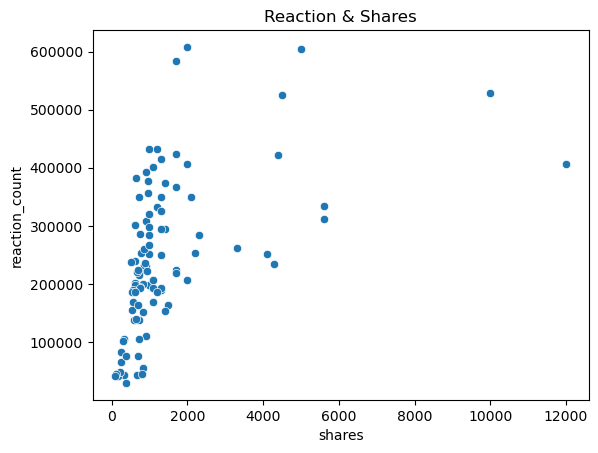

In [18]:
sns.scatterplot(x='shares', y='reaction_count', data=raw_df)
plt.title('Reaction & Shares')

Tương quan reaction_count và shares

Text(0.5, 1.0, 'Reaction & Comment')

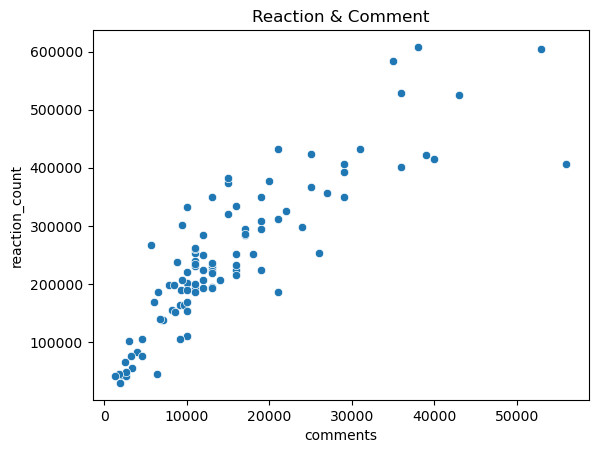

In [19]:
sns.scatterplot(x='comments', y='reaction_count', data=raw_df)
plt.title('Reaction & Comment')